## Hyperparameter optimization trial code ##

In [1]:
# Using Iris dataset to test #
import automation_script
import pandas as pd
import numpy as np
from os import path

dataset_name = "UCI Iris"
dataset_info = automation_script.get_url(dataset_name)

In [2]:
# Import iris dataset #
url = "../data/iris.csv" if path.exists("../data/iris.csv") else dataset_info['url']
data = pd.read_csv(url , delimiter=",", header=None, index_col=False)
class_name,index = np.unique(data.iloc[:,-1],return_inverse=True)
data.iloc[:,-1] = index
data = data.loc[data[4] != 2]
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
type(Y)

pandas.core.series.Series

In [3]:
scikit_score, scikit_params, predictions = automation_script.get_scikit_params(X,Y)

1.0


In [ ]:
predictions = pd.Series(predictions)
print(predictions)


In [ ]:
print(Y)

In [4]:
config = {
    'epoch': 200,
    'batch_size': 10,
    'verbose': 0,
    'model_info': {
        'loss':'binary_crossentropy',
        'optimizer':'adam',
        'metrics':['accuracy']
    }
}

keras_score,keras_params = automation_script.get_keras_params(X,Y,predictions,dataset_info,config)

Using TensorFlow backend.


60/60 [==============================] - 0s 270us/step

acc: 93.33%

acc: 93.33%


---

### Talos trial ###

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Nadam
from keras.losses import categorical_crossentropy, logcosh
from keras.activations import sigmoid
import talos as ta
from sklearn.model_selection import train_test_split


x, y = ta.datasets.iris()

# then define the parameter boundaries

p = {'lr': (2, 10, 30),
     'first_neuron': [3],
     'batch_size': [20, 30, 40],
     'epochs': [300],
     'weight_regulizer': [None],
     'emb_output_dims': [None],
     'optimizer': ['adam', 'nadam'],
     'losses': [categorical_crossentropy, logcosh],
     'activation': [sigmoid]
    }


# then define your Keras model
def iris_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation']))

    model.compile(optimizer=params['optimizer'],
                  loss=params['losses'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])

    return out, model


# and run the scan
h = ta.Scan(x, y,
            params=p,
            dataset_name='first_test',
            experiment_no='a',
            model=iris_model,
            grid_downsample=0.5)

SyntaxError: keyword argument repeated (<ipython-input-4-ff813b45e00a>, line 54)

In [7]:
h.details

random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
grid_downsample                     0.5
reduction_threshold                 0.2
reduction_metric                val_acc
reduce_loss                       False
experiment_name            first_test_a
complete_time            12/08/18/13:25
x_shape                        (150, 4)
y_shape                        (150, 3)
dtype: object

In [8]:
h.data

,round_epochs,val_loss,val_acc,loss,acc,lr,first_neuron,batch_size,epochs,weight_regulizer,emb_output_dims,optimizer,losses,activation
1,300,0.08858369373612934,0.666666673289405,0.08418526039237068,0.6666666836965651,3,3,20,300,None,None,adam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
2,300,0.05248355741302172,0.800000011920929,0.04764235232557569,0.800000011920929,4,3,30,300,None,None,nadam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
3,300,0.9987502760357327,0.3777777784400516,0.9731237320672899,0.34285714016074226,8,3,20,300,None,None,nadam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x00000269904071E0>
4,300,0.38364354769388836,0.9555555515819125,0.34661208731787546,0.9809523764110747,2,3,20,300,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x00000269904071E0>
5,300,0.05936168465349409,0.7111111349529691,0.052327110121647515,0.7904761972881499,2,3,20,300,None,None,adam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
6,300,0.45947853061887955,0.9333333240614997,0.413329541683197,0.9142857364245823,6,3,40,300,None,None,nadam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x00000269904071E0>
7,300,0.05031700929005941,0.8666666746139526,0.04475252277084759,0.8476190481867109,2,3,30,300,None,None,nadam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
8,300,0.053075301150480904,0.7111111084620158,0.04616005026868412,0.7904762029647827,8,3,30,300,None,None,nadam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
9,300,0.04999263874358601,0.9333333240614997,0.04349598341754505,0.9142857193946838,2,3,20,300,None,None,nadam,<function logcosh at 0x00000269903D00D0>,<function sigmoid at 0x00000269904071E0>
10,300,0.5535925030708313,0.8666666746139526,0.5242790494646344,0.9333333373069763,9,3,30,300,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x00000269904071E0>


In [9]:
h.peak_epochs_df

,val_loss,val_acc,loss,acc,acc_epoch,loss_epoch
1,299,299,299,253,1.222900e-03,0.000483
2,299,299,299,299,8.673299e-04,0.000557
3,299,8,299,299,inf,0.000586
4,299,299,299,293,5.222969e-04,0.000631
5,299,289,299,288,2.409126e-03,0.001165
6,299,291,299,288,2.431782e-03,0.002397
7,299,298,299,263,1.853485e-03,0.002782
8,299,298,299,274,7.737171e-04,0.002146
9,299,278,299,279,inf,0.001710
10,299,271,299,282,1.979226e-03,0.001124


In [10]:
h.y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [5]:
from talos import Reporting
r = Reporting('first_test_a.csv')

In [8]:
r.data

,round_epochs,val_loss,val_acc,loss,acc,lr,first_neuron,batch_size,epochs,weight_regulizer,emb_output_dims,optimizer,losses,activation
0,300,0.373321,0.977778,0.362352,0.961905,7,3,20,300,None,None,nadam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
1,300,0.501046,0.777778,0.488050,0.857143,5,3,20,300,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
2,300,1.006748,0.355556,1.004811,0.323810,5,3,40,300,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
3,300,0.340214,0.933333,0.339274,0.961905,5,3,30,300,None,None,nadam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
4,300,0.937960,0.533333,0.937334,0.619048,4,3,40,300,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
5,300,0.051004,0.733333,0.049569,0.723810,4,3,40,300,None,None,nadam,<function logcosh at 0x000001D8099AA950>,<function sigmoid at 0x000001D8099D4A60>
6,300,0.969056,0.355556,0.969826,0.333333,2,3,30,300,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
7,300,0.289366,0.977778,0.281558,0.961905,2,3,20,300,None,None,nadam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>
8,300,0.072158,0.644444,0.067085,0.676190,3,3,30,300,None,None,adam,<function logcosh at 0x000001D8099AA950>,<function sigmoid at 0x000001D8099D4A60>
9,300,0.434655,0.955556,0.423898,0.952381,9,3,30,300,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001D8099D4A60>


In [12]:
r.high('val_acc')

0.9777777989705404

In [13]:
# Number of rounds it took to find the best model #
r.rounds2high()

18

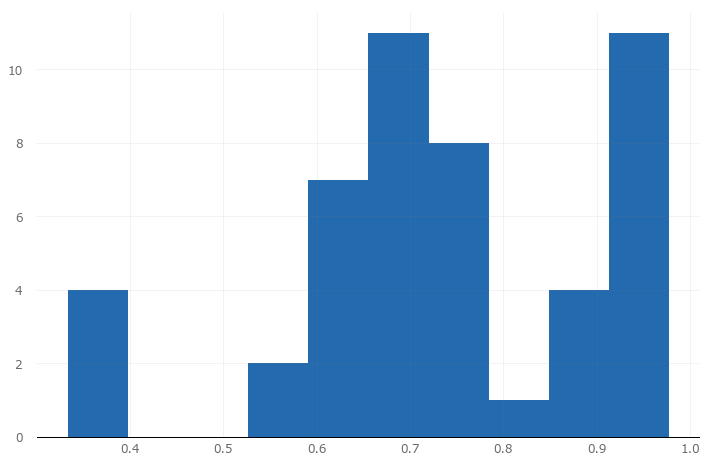

In [14]:
# x-axis is val_acc. What is y-axis? #
r.plot_hist()

In [23]:
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [24]:
from talos import Predict
p = Predict(h)
p.predict_classes(x)

array([2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1], dtype=int64)

In [29]:
from talos import Evaluate

# create the evaluate object
e = Evaluate(h)
e.evaluate(x, y, average='macro')

14.74% (+/- 4.88%)


---

#### Notes ####

1. Why is there a mismatch in y_shape of our model and   
Talos model?
2. How to validate or cross check the performance of  
Talos optimization?
3. The y_shape is 3(and hence expected to have 3 classes).  
But the y data contains only 2 classes. Why?  
3. **Report method is no longer available**
 - Any alternates available?
4. Why does p.predict(x) return 3 values instead of one value? What are these 3 values?
5. What does evaluate do? The 'average' param.